In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

# Load your CSV with correct encoding
data = pd.read_csv(r"/content/drive/MyDrive/Sales.csv", encoding="latin1")

# Now you can work with it
print(data.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [6]:
# Convert columns to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')

# Display the first few rows to check date conversion
data[['Order Date', 'Ship Date']].head()


,Order Date,Ship Date
0,2016-11-08,2016-11-11
1,2016-11-08,2016-11-11
2,2016-06-12,2016-06-16
3,2015-10-11,2015-10-18
4,2015-10-11,2015-10-18


In [8]:
# Calculate Inventory Days (difference between Ship Date and Order Date)
data['Inventory_Days'] = (data['Ship Date'] - data['Order Date']).dt.days

# Display the first few rows with the new Inventory_Days column
data[['Order ID', 'Order Date', 'Ship Date', 'Inventory_Days']].head()


,Order ID,Order Date,Ship Date,Inventory_Days
0,CA-2016-152156,2016-11-08,2016-11-11,3
1,CA-2016-152156,2016-11-08,2016-11-11,3
2,CA-2016-138688,2016-06-12,2016-06-16,4
3,US-2015-108966,2015-10-11,2015-10-18,7
4,US-2015-108966,2015-10-11,2015-10-18,7


In [10]:
# Calculate Profitability as Profit / Sales
data['Profitability'] = data['Profit'] / data['Sales']

# Display the first few rows with the Profitability column
data[['Order ID', 'Profit', 'Sales', 'Profitability']].head()


,Order ID,Profit,Sales,Profitability
0,CA-2016-152156,41.9136,261.9600,0.1600
1,CA-2016-152156,219.5820,731.9400,0.3000
2,CA-2016-138688,6.8714,14.6200,0.4700
3,US-2015-108966,-383.0310,957.5775,-0.4000
4,US-2015-108966,2.5164,22.3680,0.1125


In [12]:
# Replace infinite values with NaN and drop rows with NaN in Inventory_Days or Profitability
import numpy as np
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['Inventory_Days', 'Profitability'])

# Verify the cleanup
data[['Inventory_Days', 'Profitability']].head()


,Inventory_Days,Profitability
0,3,0.1600
1,3,0.3000
2,4,0.4700
3,7,-0.4000
4,7,0.1125


In [13]:
# Calculate the correlation between Inventory Days and Profitability
correlation = data['Inventory_Days'].corr(data['Profitability'])

# Output the correlation result
print(f"Correlation between Inventory Days and Profitability: {correlation:.2f}")


Correlation between Inventory Days and Profitability: -0.01


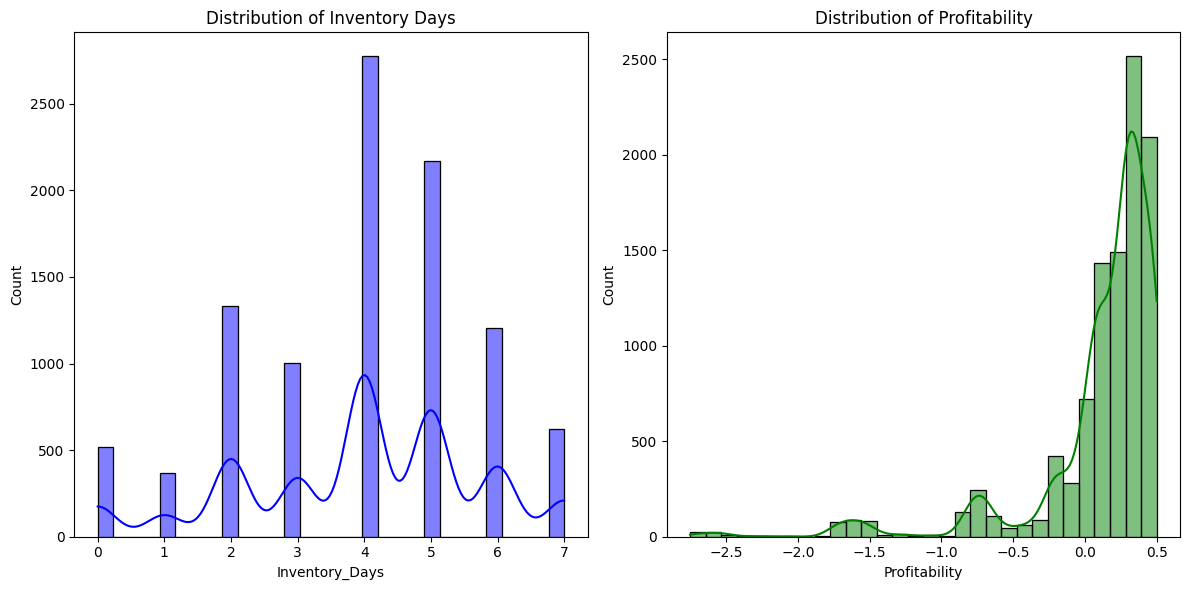

In [15]:
# Plot histograms of Inventory Days and Profitability
plt.figure(figsize=(12, 6))

# Inventory Days histogram
plt.subplot(1, 2, 1)
sns.histplot(data['Inventory_Days'], kde=True, color='blue', bins=30)
plt.title('Distribution of Inventory Days')

# Profitability histogram
plt.subplot(1, 2, 2)
sns.histplot(data['Profitability'], kde=True, color='green', bins=30)
plt.title('Distribution of Profitability')

plt.tight_layout()
plt.show()


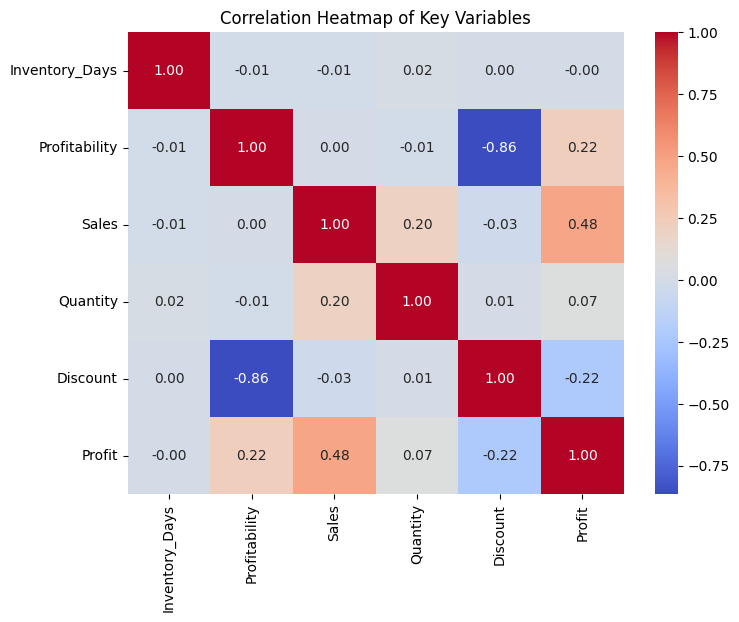

In [16]:
# Calculate correlation matrix for all numerical columns
correlation_matrix = data[['Inventory_Days', 'Profitability', 'Sales', 'Quantity', 'Discount', 'Profit']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

# Adding title
plt.title('Correlation Heatmap of Key Variables')

# Show plot
plt.show()
